# Plot permittivity
Start by importing some useful routines

In [1]:
import numpy                      as np
import sys, os
home_directory = os.path.join("..","..","..")
sys.path.insert(0, home_directory)
from PDielec.HelperRoutines   import getMaterial
from PDielec.HelperRoutines   import calculatePowderSpectrum
from PDielec.HelperRoutines   import calculateSingleCrystalSpectrum


## Define the materials to be used.
The getMaterial function looks in the materials database to find the materials needed
The function can also be used to read in a DFT file
In this example the default MaterialsDataBase.xlsx file is read

In [2]:
    ptfe = getMaterial('ptfe')
    sapphire = getMaterial('Sapphire')

## Print material information
The material print() function can be used to provide information about the material
Other functions that might be useful are getPermittivityFunction(), getCell() and getDensity()

In [3]:
sapphire.print()

Material name: Sapphire
Material density: 3.98
Material type: FPSQ
Material is scalar?: False
Material is tensor?: True
Material permittivity: FPSQ
Material unit cell
Space group international symbol is:  P 1
Space group number is              :  1
Units for length are:  Angstrom
 
Unit Cell a,b,c 
     4.760500     4.760500    12.995600
 
Unit Cell alpha,beta,gamma
    90.000000    90.000000   120.000000
 
lattice
     4.122714    -2.380250     0.000000
     0.000000     4.760500     0.000000
     0.000000     0.000000    12.995600
 
Element names
 
 
Element masses
 


## Use the permittivity function of the material
The permittivity function can be used to calculate the material permittivity over a range of frequencies

In [4]:
frequencies = np.arange(300,500,0.1)
permittivities = [ sapphire.getPermittivityFunction()(f) for f in frequencies]

## Plot the real and imaginary components of the permittivity 

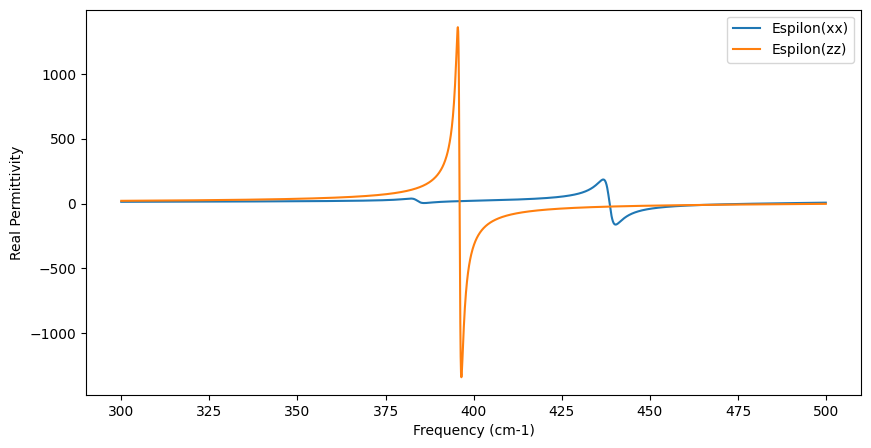

(<matplotlib.legend.Legend at 0x713465522e90>, None)

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5)) # set the size of the figure
plt.plot(frequencies, [ p[0,0].real for p in  permittivities ],label='Espilon(xx)') 
plt.plot(frequencies, [ p[2,2].real for p in  permittivities ],label='Espilon(zz)')
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Real Permittivity')
plt.legend(), plt.show()

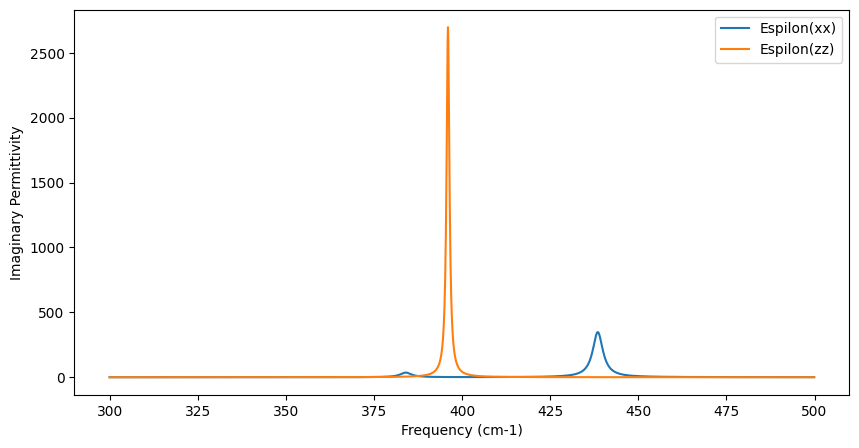

(<matplotlib.legend.Legend at 0x713465316850>, None)

In [6]:
plt.figure(figsize = (10,5)) 
plt.plot(frequencies, [ p[0,0].imag for p in  permittivities ],label='Espilon(xx)') 
plt.plot(frequencies, [ p[2,2].imag for p in  permittivities ],label='Espilon(zz)')
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Imaginary Permittivity')
plt.legend(), plt.show()